In [238]:
import pandas as pd 
from cmapPy.pandasGEXpress.parse_gct import parse
from cmapPy.pandasGEXpress import concat
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from upsetplot import plot
from upsetplot import from_memberships

In [197]:
acc = 'GSE141549'
strat = 'third'
up_down = 'upreg'
filepath1 = '{}/{}/{}_big_150.gct'.format(acc, strat, strat)
filepath2 = '{}/{}/{}_big_150b.gct'.format(acc, strat, strat)
filepath2 = '{}/{}/{}_big_150c.gct'.format(acc, strat, strat)
#filepath4 = '{}/{}_{}/{}_150d.gct'.format(acc, acc, strat, up_down)
#filepath5 = '{}/{}_{}/{}_150e.gct'.format(acc, acc, strat, up_down)


df1 = parse(filepath1, convert_neg_666=True)
df2 = parse(filepath2, convert_neg_666=True)
df3 = parse(filepath3, convert_neg_666=True)
#df4 = parse(filepath4, convert_neg_666=True)
#df5 = parse(filepath5, convert_neg_666=True)
df = concat.assemble_data([df1.data_df, df2.data_df, df3.data_df], concat_direction='vert')


In [198]:
metadata1 = df1.row_metadata_df
metadata2 = df2.row_metadata_df
metadata3 = df3.row_metadata_df
#metadata4 = df4.row_metadata_df
#metadata5 = df5.row_metadata_df

temp1 = metadata1[~metadata1['moa'].isna()]
temp2 = metadata2[~metadata2['moa'].isna()]
temp3 = metadata3[~metadata3['moa'].isna()]
#temp4 = metadata4[~metadata4['moa'].isna()]
#temp5 = metadata5[~metadata5['moa'].isna()]

temp1['norm_cs'] = ''
temp2['norm_cs'] = ''
temp3['norm_cs'] = ''
#temp4['norm_cs'] = ''
#temp5['norm_cs'] = ''

dfs = [temp1, temp2, temp3]

/var/folders/hm/d3mf7x5d0ks7hd20j03cl94w0000gq/T/ipykernel_81312/102644304.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['norm_cs'] = ''
/var/folders/hm/d3mf7x5d0ks7hd20j03cl94w0000gq/T/ipykernel_81312/102644304.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['norm_cs'] = ''
/var/folders/hm/d3mf7x5d0ks7hd20j03cl94w0000gq/T/ipykernel_81312/102644304.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [199]:
for i in range(0, len(dfs)):
    temp = dfs[i]
    for index,row in temp.iterrows():
        norm_cs = df.loc[[index]]['norm_cs'][index]
        temp.at[index,'norm_cs'] = norm_cs

    temp[['pert_iname', 'moa','target_name', 'fdr_q_nlog10', 'norm_cs']].to_csv('{}/{}_{}.csv'.format(acc,strat,i))
    
    

OG dataset eval ---

In [202]:
strats = ['early', 'late', 'unstrat']
up_down = ['upreg', 'downreg']

for strat in strats:
    for ud in up_down:
        df = pd.read_csv('{}/{}_{}.csv'.format(acc, strat, ud), header=0)
        potential_drugs = []
        for index, row in df.iterrows():
            if (type(row['norm_cs']) == float):
                norm_cs = row['norm_cs']
            else:
                norm_cs_temp = row['norm_cs'].strip('[').strip(' ]').strip(']').split(' ')
                norm_cs_temp = [x for x in norm_cs_temp if len(x) != 0]
                norm_cs = [float(x) for x in norm_cs_temp][0]
            if (norm_cs < 0 and (not pd.isnull(row['target_name']))):
                temp = {'name': row['pert_iname'], 'target': row['target_name'], 'norm_cs': norm_cs}
                potential_drugs.append(temp)
        pot_drug_df = pd.DataFrame(potential_drugs)
        pot_drug_df.to_csv('{}/{}_{}_drugs.csv'.format(acc, strat, ud), index=False)
                
        

KeyboardInterrupt: 

In [253]:
drug_set = {}
acc = 'GSE51981'
strats = ['early', 'late', 'unstrat']
up_down = ['upreg', 'downreg']

strat_drug_list = []
for strat in strats:
    drug_set[strat] = set()
    for ud in up_down:
        df = pd.read_csv('{}/drugs/{}_{}_drugs.csv'.format(acc, strat, ud), header =0)
        df = df[df['target'].notna()]
        df = df[df['name'].str[0].str.islower()]
        df = df[df['target'].notna()]
        plt.hist(df['norm_cs'].tolist())
        plt.savefig('{}/figs/{}_{}_scoreHist_{}.png'.format(acc,strat, ud,acc))
        plt.clf()
        x = np.array(df['norm_cs'].tolist())
        std = [x.mean() - 2 * x.std(), x.mean() + 2 * x.std()]
        df = df[df['norm_cs'] <= -1.5] #std[0]]
        print ('{} {}: {} potential drugs'.format(strat, ud, len(df['name'].unique())))
        for index,row in df.iterrows():
            drug_set[strat].add(row['name'])
            strat_drug_list.append({'stage': strat, 'drug': row['name'], 'target': row['target']})

        #x = np.array(df['norm_cs'].tolist())
        #print ([x.mean() - 3 * x.std(), x.mean() + 3 * x.std()])
        
drug_set_count = {}
for strat in drug_set:
    drug_set_count[strat] = len(drug_set[strat])
print (drug_set_count)
strat_drug_df = pd.DataFrame(strat_drug_list)
strat_drug_df.to_csv('{}/drugs/stage_drug.csv'.format(acc), index=False)


early upreg: 154 potential drugs
early downreg: 119 potential drugs
late upreg: 179 potential drugs
late downreg: 171 potential drugs
unstrat upreg: 169 potential drugs
unstrat downreg: 157 potential drugs
{'early': 244, 'late': 287, 'unstrat': 285}


<Figure size 640x480 with 0 Axes>

In [272]:
all_stages_drug = drug_set['early'] & drug_set['late'] & drug_set['unstrat']

all_df = df.loc[df['name'].isin(all_stages_drug)]

all_df_sort = all_df.sort_values(by='norm_cs', ascending=True)

all_df_sort.to_csv('{}/drugs/common_drugs.csv'.format(acc), index=False)

In [235]:
'Number of drugs in all 3 categories: ' + str(len(drug_set['early'] & drug_set['late'] & drug_set['unstrat']))

'Number of drugs in all 3 categories: 102'

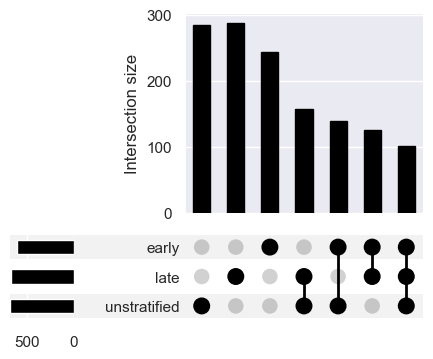

In [247]:
perm_strat = [['early'],['late'],['unstratified'],['early', 'late'],['early', 'unstratified'],
              ['late', 'unstratified'],['early', 'late', 'unstratified']]
data = [drug_set_count['early'], drug_set_count['late'], drug_set_count['unstrat'], 
       (len(drug_set['early'] & drug_set['late'])), (len(drug_set['early'] & drug_set['unstrat'])),
       len(drug_set['late'] & drug_set['unstrat']), len(drug_set['early'] & drug_set['late'] & drug_set['unstrat'])]



example = from_memberships(perm_strat, data=data)
plot(example) 
plt.savefig('{}/figs/drug_set_{}.png'.format(acc, acc))
plt.show()





In [321]:
top_drugs = all_df_sort[:42]['name'].unique()

matrix_temp = []
for strat in strats:
    df_up = pd.read_csv('{}/drugs/{}_upreg_drugs.csv'.format(acc, strat), header =0)
    df_down = pd.read_csv('{}/drugs/{}_downreg_drugs.csv'.format(acc, strat), header =0)
    
    up_names = set(df_up['name'].unique())
    down_names = set(df_down['name'].unique())
    for name in top_drugs:
        if (name in up_names):
            norm_cs = min(df_up[df_up['name'] == name]['norm_cs'].tolist())
        else:
            norm_cs = min(df_down[df_down['name'] == name]['norm_cs'].tolist())
        matrix_temp.append({'strat':strat, 'name':name, 'norm_cs':float(norm_cs)})
sns_matrix = pd.DataFrame(matrix_temp)

'''
heatmap_matrix= pd.DataFrame(columns=top_drugs, index=strats)
for strat in strats:
    df_up = pd.read_csv('{}/drugs/{}_upreg_drugs.csv'.format(acc, strat), header =0)
    df_down = pd.read_csv('{}/drugs/{}_downreg_drugs.csv'.format(acc, strat), header =0)
    
    up_names = set(df_up['name'].unique())
    down_names = set(df_down['name'].unique())
    for name in top_drugs:
        if (name in up_names):
            norm_cs = min(df_up[df_up['name'] == name]['norm_cs'].tolist())
        else:
            norm_cs = min(df_down[df_down['name'] == name]['norm_cs'].tolist())
        heatmap_matrix.loc[strat, name] = float(norm_cs)'''



"\nheatmap_matrix= pd.DataFrame(columns=top_drugs, index=strats)\nfor strat in strats:\n    df_up = pd.read_csv('{}/drugs/{}_upreg_drugs.csv'.format(acc, strat), header =0)\n    df_down = pd.read_csv('{}/drugs/{}_downreg_drugs.csv'.format(acc, strat), header =0)\n    \n    up_names = set(df_up['name'].unique())\n    down_names = set(df_down['name'].unique())\n    for name in top_drugs:\n        if (name in up_names):\n            norm_cs = min(df_up[df_up['name'] == name]['norm_cs'].tolist())\n        else:\n            norm_cs = min(df_down[df_down['name'] == name]['norm_cs'].tolist())\n        heatmap_matrix.loc[strat, name] = float(norm_cs)"

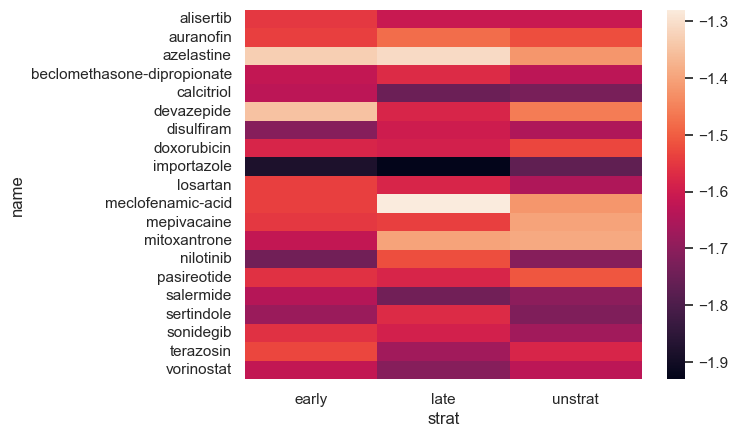

In [322]:
sns_df = sns_matrix.pivot_table(index='name', columns='strat', values='norm_cs', aggfunc=np.min)

sns.heatmap(sns_df, fmt=".1f")
plt.savefig('{}/figs/top_drugs_{}.png'.format(acc,acc))
plt.show()